## experiment of Iterative Training & Drift Detection using multiflow package(river)
### loading dataset and data preprocessing

In [3]:
# loading data
import pandas as pd
merged_data= pd.read_csv('/Users/apple/Downloads/Merged_Aggregated_data_jul12.csv')

In [4]:
pwd

'/Users/apple/Documents/MSN'

In [5]:
merged_data.columns

Index(['SiteID', 'CaptureDateTime', 'CaptureDateTime_ACEM', 'MeterID',
       'MeterSlaveID', 'MeterPowerSource', 'MeterUsage', 'MeterKWh1',
       'MeterKWh2', 'avg_load_dg', 'CaptureDateTime_BASIC',
       'ShelterTemperature', 'AmbientTemperature', 'EBRunhours', 'DG1Runhours',
       'BatteryRunhours', 'UnknownRunhours', 'NoLoadRunhours',
       'SiteOutagehours', 'PowerSource', 'CaptureDateTime_FUEL', 'FuelLevel',
       'FuelSensorStatus', 'Channel1ChargeDischargeCurrent_0',
       'Channel1ChargeDischargeCurrent_1', 'Channel2ChargeDischargeCurrent_0',
       'Channel2ChargeDischargeCurrent_1', 'Channel3ChargeDischargeCurrent_0',
       'Channel3ChargeDischargeCurrent_1', 'Channel4ChargeDischargeCurrent_0',
       'Channel4ChargeDischargeCurrent_1', 'DCVoltage_0', 'DCVoltage_1'],
      dtype='object')

In [7]:
data_for_poc= merged_data[['CaptureDateTime' , 'AmbientTemperature','ShelterTemperature', 'Channel1ChargeDischargeCurrent_1', 'Channel2ChargeDischargeCurrent_0',
       'Channel2ChargeDischargeCurrent_1', 'Channel3ChargeDischargeCurrent_0',
       'Channel3ChargeDischargeCurrent_1', 'Channel4ChargeDischargeCurrent_0',
       'Channel4ChargeDischargeCurrent_1']]

In [ ]:
!pip3 install streamz

In [12]:
import pandas as pd
from streamz.dataframe import DataFrame # for handling streaming tabular data
from streamz import Stream

stream = Stream()
example = pd.DataFrame({'name': [], 'amount': []})
sdf = DataFrame(stream, example=data_for_poc)

In [14]:
type(sdf)

streamz.dataframe.core.DataFrame

### learning methods that  can be implemented-

https://scikit-multiflow.readthedocs.io/en/stable/api/api.html#learning-methods

# prequential Evalution - Temp Forecasting EIO Use case
### multiflow/ creme/ river packages

In [20]:
# Imports
from skmultiflow.neural_networks import PerceptronMask
from skmultiflow.data import SEAGenerator
# Setup a data stream
stream = SEAGenerator(random_state=1)
# Setup the Perceptron Mask
perceptron = PerceptronMask()
n_samples = 0
correct_cnt = 0
while n_samples < 5000 and stream.has_more_samples():
    X, y = stream.next_sample()
    perceptron.partial_fit(X, y, classes=stream.target_values)
    my_pred = perceptron.predict(X)
    if y[0] == my_pred[0]:
        correct_cnt += 1
    perceptron.partial_fit(X, y, classes=stream.target_values)
    n_samples += 1
# Display the results
print('Perceptron Mask usage example')
print('{} samples analyzed'.format(n_samples))
print("Perceptron's performance: {}".format(correct_cnt / n_samples))

Perceptron Mask usage example
5000 samples analyzed
Perceptron's performance: 0.9866


In [24]:
# ! pip3 install scikit-multiflow

ERROR: Could not find a version that satisfies the requirement skmulti-flow (from versions: none)
ERROR: No matching distribution found for skmulti-flow


In [21]:
stream.next_sample() # has to be stream object

(array([[8.05802036, 5.41587407, 8.78886756]]), array([1]))

In [22]:
X

array([[4.53352198, 0.45188963, 6.9652811 ]])

In [23]:
y

array([0])

### NN having error for regression model as classes has to be passed
seems like not suitable for classification model

In [35]:
# Imports
from skmultiflow.neural_networks import PerceptronMask

# Setup a data stream

# Setup the Perceptron Mask
perceptron = PerceptronMask()
n_samples = 0
correct_cnt = 0
for i in range(len(merged_data)):
    
    X=merged_data[['AmbientTemperature', 'Channel1ChargeDischargeCurrent_1', 'Channel2ChargeDischargeCurrent_0',
       'Channel2ChargeDischargeCurrent_1', 'Channel3ChargeDischargeCurrent_0',
       'Channel3ChargeDischargeCurrent_1', 'Channel4ChargeDischargeCurrent_0',
       'Channel4ChargeDischargeCurrent_1']].iloc[i:i+1,:]
    y=merged_data[['ShelterTemperature']].iloc[i:i+1,:]
    perceptron.partial_fit(X, y, classes= None)
    my_pred = perceptron.predict(X)
    if y[0] == my_pred[0]:
        correct_cnt += 1
    perceptron.partial_fit(X, y)
# Display the results
print('Perceptron Mask usage example')
print('{} samples analyzed'.format(n_samples))
print("Perceptron's performance: {}".format(correct_cnt / n_samples))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: classes must be passed on the first call to partial_fit.

### scikit-multiflow requires a few interfaces, not present in scikit-learn, This mask serves as a 

##  wrapper for the Perceptron classifier. ( for neural network)

# ---------     fitting Random Forest for Temprature forecasting  ---

In [43]:
# Imports
from skmultiflow.data import RegressionGenerator
from skmultiflow.meta import AdaptiveRandomForestRegressor
import numpy as np
# Setup a data stream

# Prepare stream for use
# Setup the Adaptive Random Forest regressor
arf_reg = AdaptiveRandomForestRegressor(random_state=123456)
# Auxiliary variables to control loop and track performance
n_samples = 0
# Run test-then-train loop for max_samples and while there is data
for i in range(200):
    
    X=np.array(merged_data[['AmbientTemperature', 'Channel1ChargeDischargeCurrent_1', 'Channel2ChargeDischargeCurrent_0',
       'Channel2ChargeDischargeCurrent_1', 'Channel3ChargeDischargeCurrent_0',
       'Channel3ChargeDischargeCurrent_1', 'Channel4ChargeDischargeCurrent_0',
       'Channel4ChargeDischargeCurrent_1']].iloc[i:i+1,:])
    
    print(X)
    y=np.array(merged_data[['ShelterTemperature']].iloc[i:i+1,:])
    
    print(y)
    
    y_pred[n_samples] = arf_reg.predict(X)[0]
    arf_reg.partial_fit(X, y)
    n_samples+=1


[[23.17625  0.1      1.45125 11.8125   0.       9.84375  0.       0.     ]]
[[25.40375]]
[[21.64333333  0.26666667  1.47       11.21333333  0.          9.79
   0.          0.        ]]
[[23.39]]
[[20.246  0.     1.43  11.29   0.     9.776  0.     0.   ]]
[[22.706]]
[[22.59285714  0.          1.44       12.03714286  0.          9.81285714
   0.          0.        ]]
[[25.35285714]]
[[20.74666667  0.          1.44       11.83666667  0.          9.92666667
   0.          0.        ]]
[[22.47666667]]
[[20.82857143  0.          1.40714286 11.53428571  0.          9.93
   0.          0.        ]]
[[23.69142857]]
[[22.82   0.     1.43  11.374  0.     9.588  0.     0.   ]]
[[25.132]]
[[20.1         0.          1.41666667 10.89        0.          9.59333333
   0.          0.        ]]
[[22.41333333]]
[[19.81   0.     1.37  11.064  0.     9.802  0.     0.   ]]
[[22.86]]
[[22.52428571  0.          1.39285714 10.99857143  0.          9.74142857
   0.          0.        ]]
[[25.29857143]]
[[20.06  

[[22.06        0.          1.325      14.93166667  0.         10.75333333
   0.          0.        ]]
[[25.36]]
[[20.62        0.          1.34666667 14.85333333  0.         10.4
   0.          0.        ]]
[[23.24666667]]
[[19.194  0.     1.274 13.62   0.    10.674  0.     0.   ]]
[[22.384]]
[[21.89714286  0.          1.31571429 15.09428571  0.         10.75142857
   0.          0.        ]]
[[25.39857143]]
[[21.52        0.27        1.37       14.46666667  0.         10.80333333
   0.          0.        ]]
[[23.77]]
[[19.47333333  0.          1.30666667 12.45666667  0.         10.44
   0.          0.        ]]
[[22.35]]
[[19.308  0.     1.244 13.722  0.    10.296  0.     0.   ]]
[[22.834]]
[[21.346  0.     1.298 12.132  0.    10.082  0.     0.   ]]
[[24.346]]
[[19.182  0.     1.268 12.458  0.    10.062  0.     0.   ]]
[[22.196]]
[[21.54833333  0.          1.29       12.905       0.          9.73833333
   0.          0.        ]]
[[24.73666667]]
[[22.79        0.11857143  1.35428571 1

[[18.834  0.     1.258 11.308  0.    10.56   0.     0.   ]]
[[22.144]]
[[20.632  0.     1.25  12.092  0.    10.908  0.     0.   ]]
[[24.584]]
[[22.022  0.     1.334 12.42   0.    11.148  0.     0.   ]]
[[25.334]]
[[20.26666667  0.          1.33333333 10.88        0.         10.13666667
   0.          0.        ]]
[[23.28666667]]
[[18.986  0.     1.256 10.962  0.    10.13   0.     0.   ]]
[[22.296]]
[[20.958  0.     1.268 11.602  0.    10.75   0.     0.   ]]
[[24.622]]
[[19.95333333  0.          1.28666667 10.97333333  0.         10.35
   0.          0.        ]]
[[22.62]]
[[19.87142857  0.          1.24571429 11.76142857  0.         11.
   0.          0.        ]]
[[23.38]]
[[22.07   0.     1.318 10.988  0.    10.148  0.     0.   ]]
[[25.458]]
[[20.83        0.          1.33666667 11.87666667  0.         10.98
   0.          0.        ]]
[[23.20666667]]
[[19.096  0.     1.26  11.026  0.    10.304  0.     0.   ]]
[[22.196]]
[[21.31   0.     1.28  11.46   0.    10.974  0.     0.   ]]
[[2

In [46]:
n_samples = 0
max_samples = 200
y_true = np.array(merged_data[['ShelterTemperature']].iloc[0:max_samples,:])

# Display results
print('Adaptive Random Forest regressor example')
print('{} samples analyzed.'.format(max_samples))
print('Mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

Adaptive Random Forest regressor example
200 samples analyzed.
Mean absolute error: 1.3086002981036164


In [47]:
import matplotlib.pyplot as plt

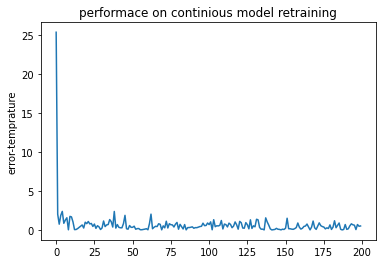

In [75]:
y_true= y_true.reshape(200,)
data_for_plot= np.abs(y_true - y_pred)

data_for_plot.shape
plt.plot(data_for_plot)
plt.title('performace on continious model retraining')
plt.ylabel('error-temprature')
plt.show()

## ------------   Drift Detection on ambient temprature -----------
https://scikit-multiflow.readthedocs.io/en/stable/api/api.html#module-skmultiflow.drift_detection

drift_detection.ADWIN

Adaptive Windowing method for concept drift detection.

drift_detection.DDM

Drift Detection Method.

drift_detection.EDDM

Early Drift Detection Method.

drift_detection.HDDM_A

Drift Detection Method based on Hoeffding’s bounds with moving average-test.

drift_detection.HDDM_W

Drift Detection Method based on Hoeffding’s bounds with moving weighted average-test.

drift_detection.KSWIN

Kolmogorov-Smirnov Windowing method for concept drift detection.

drift_detection.PageHinkley

Page-Hinkley method for concept drift detection.



In [124]:
# Imports
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.array(merged_data)
# Changing the data concept from index 999 to 2000

# Adding stream elements to ADWIN and verifying if drift occurred
for i in range(200):
    
    pp= np.array(merged_data['AmbientTemperature'][i])
    
    adwin.add_element(pp)
    if adwin.detected_change():
        print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: ['04JHO004' '2021-02-23 00:00:00' '2021-02-22 23:59:00' 129781.0 20.0 1.0
 1.0 2262.02 0.03 0.0 '2021-02-22 23:59:00' 25.174285714285716
 22.43285714285714 3731644.0 0.0 35506.0 8355708.0 2278.0 0.0 1.0
 '2021-02-22 23:59:00' 361.1352 1.0 0.0 0.0 1.335714285714286 10.03 0.0
 9.904285714285717 0.0 0.0 54.70714285714285 54.68714285714286] - at index: 191


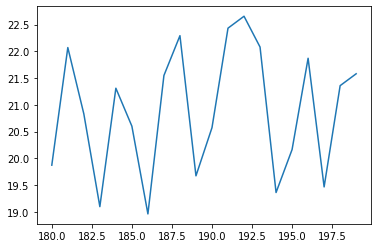

In [119]:
plt.plot(merged_data['AmbientTemperature'][180:200])

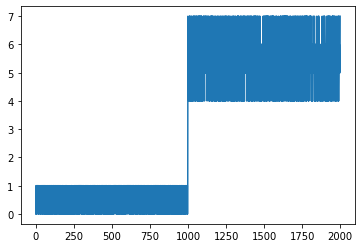

In [7]:
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
for i in range(999, 2000):
    data_stream[i] = np.random.randint(4, high=8)
# Adding stream elements to ADWIN and verifying if drift occurred

import matplotlib.pyplot as plt
plt.plot(data_stream)

In [8]:
for i in range(2000):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: 4 - at index: 1023
Change detected in data: 7 - at index: 1055
Change detected in data: 7 - at index: 1087


In [89]:
data_stream[0:1,:]

array([['04JHO004', '2021-02-21 00:15:00', '2021-02-21 00:14:00',
        129781.0, 20.0, 1.0, 1.0, 2156.49, 0.03, 0.0,
        '2021-02-21 00:14:00', 25.40375, 23.176250000000003, 3559779.0,
        0.0, 35506.0, 8355708.0, 2278.0, 0.0, 1.0, '2021-02-21 00:14:00',
        361.6435, 1.0, 0.12125, 0.1, 1.45125, 11.8125, 0.0,
        9.843750000000002, 0.0, 0.0, 54.65000000000001,
        54.61750000000001]], dtype=object)

In [100]:
pp.shape[1]

8

In [101]:
pp2= pp.reshape(pp.shape[1],)

In [103]:
pp2

array([23.17625,  0.1    ,  1.45125, 11.8125 ,  0.     ,  9.84375,
        0.     ,  0.     ])

In [105]:
# Imports
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
#for i in range(999, 2000):
# Adding stream elements to ADWIN and verifying if drift occurred
for i in range(200):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

In [110]:
type(data_stream[1])

numpy.int64

In [118]:
merged_data.head(100)

,SiteID,CaptureDateTime,CaptureDateTime_ACEM,MeterID,MeterSlaveID,MeterPowerSource,MeterUsage,MeterKWh1,MeterKWh2,avg_load_dg,...,Channel1ChargeDischargeCurrent_0,Channel1ChargeDischargeCurrent_1,Channel2ChargeDischargeCurrent_0,Channel2ChargeDischargeCurrent_1,Channel3ChargeDischargeCurrent_0,Channel3ChargeDischargeCurrent_1,Channel4ChargeDischargeCurrent_0,Channel4ChargeDischargeCurrent_1,DCVoltage_0,DCVoltage_1
0,04JHO004,2021-02-21 00:15:00,2021-02-21 00:14:00,129781.0,20.0,1.0,1.0,2156.49,0.03,0.0,...,0.121250,0.100000,1.451250,11.812500,0.0,9.843750,0.0,0.0,54.650000,54.617500
1,04JHO004,2021-02-21 00:30:00,2021-02-21 00:29:00,129781.0,20.0,1.0,1.0,2157.11,0.03,0.0,...,-0.446667,0.266667,1.470000,11.213333,0.0,9.790000,0.0,0.0,54.876667,54.840000
2,04JHO004,2021-02-21 00:45:00,2021-02-21 00:44:00,129781.0,20.0,1.0,1.0,2157.63,0.03,0.0,...,0.320000,0.000000,1.430000,11.290000,0.0,9.776000,0.0,0.0,54.830000,54.806000
3,04JHO004,2021-02-21 01:00:00,2021-02-21 00:59:00,129781.0,20.0,1.0,1.0,2158.06,0.03,0.0,...,-0.138571,0.000000,1.440000,12.037143,0.0,9.812857,0.0,0.0,54.692857,54.667143
4,04JHO004,2021-02-21 01:15:00,2021-02-21 01:14:00,129781.0,20.0,1.0,1.0,2158.69,0.03,0.0,...,0.000000,0.000000,1.440000,11.836667,0.0,9.926667,0.0,0.0,54.896667,54.876667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,04JHO004,2021-02-22 00:00:00,2021-02-21 23:59:00,129781.0,20.0,1.0,1.0,2209.51,0.03,0.0,...,0.161667,0.000000,1.290000,12.905000,0.0,9.738333,0.0,0.0,54.755000,54.733333
96,04JHO004,2021-02-22 00:15:00,2021-02-22 00:12:00,129781.0,20.0,1.0,1.0,2209.87,0.03,0.0,...,0.000000,0.118571,1.354286,12.565714,0.0,9.912857,0.0,0.0,54.652857,54.631429
97,04JHO004,2021-02-22 00:30:00,2021-02-22 00:27:00,129781.0,20.0,1.0,1.0,2210.44,0.03,0.0,...,0.000000,0.813333,1.393333,11.683333,0.0,9.806667,0.0,0.0,54.663333,54.673333
98,04JHO004,2021-02-22 00:45:00,2021-02-22 00:42:00,129781.0,20.0,1.0,1.0,2211.04,0.03,0.0,...,0.000000,0.000000,1.306000,11.640000,0.0,9.902000,0.0,0.0,54.792000,54.782000


In [10]:
qq= np.array([123,45])

In [11]:
pp= np.array([1,1])

In [12]:
np.dot(qq,pp)

168

In [ ]:
identift_drift_detector(warning_zone_required,type_of_drift_detection):
    '''
    warning_zone_required- when there are possibity of drift detection
    ['yes' 'no']
    
    type_of_drift_detection- ['sudden', 'gradual', 'sudden and gradual both']
    
    op-
    best algo for detecting drift
    '''
    if (warning_zone_required == 'yes':
        print('adwin')
        else:
        if(type_of_drift_detection !='sudden'):
        print('adwin')
        else:
        print('page-hickey', 'adwin')
        
        
    